In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, normalize
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import accuracy_score,plot_confusion_matrix,precision_score,recall_score,f1_score

from sklearn.ensemble import RandomForestClassifier

from scipy.signal import savgol_filter
from imblearn.over_sampling import SMOTE

In [2]:
train = pd.read_csv('..\\..\\Data\\exoTrain.csv')
test = pd.read_csv('..\\..\\Data\\exoTest.csv')
train.head()

LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7  \
0      2    93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   
1      2   -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   
2      2   532.64   535.92   513.73   496.92   456.45   466.00  464.50   
3      2   326.52   347.39   302.35   298.13   317.74   312.70  322.33   
4      2 -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34   

    FLUX.8  FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
0   -96.27  -79.89  ...     -78.07    -102.15    -102.15      25.13   
1   -85.33  -83.97  ...      -3.28     -32.21     -32.21     -24.89   
2   486.39  436.56  ...     -71.69      13.31      13.31     -29.89   
3   311.31  312.42  ...       5.71      -3.73      -3.73      30.05   
4 -1022.71 -989.57  ...    -594.37    -401.66    -401.66    -357.24   

   FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
0      48.57      92.54      39.32      61.42       5.08     -39.54  
1      -4.86       0.76     -11.70       6.46      16.00      19.93  
2     -20.88       5.06     -11.80     -28.91     -70.02     -96.67  
3      20.03     -12.67      -8.77     -17.31     -17.35      13.98  
4    -443.76    -438.54    -399.71    -384.65    -411.79    -510.54  

[5 rows x 3198 columns]

In [3]:
def reset(train,test):
    train_X = train.drop('LABEL', axis=1)
    train_y = train['LABEL'].values
    test_X = test.drop('LABEL', axis=1)
    test_y = test['LABEL'].values
    return train_X,train_y,test_X,test_y

train_X,train_y,test_X,test_y = reset(train,test)

In [4]:
def robust(df1,df2):
    scaler = RobustScaler()
    train_X = scaler.fit_transform(df1)
    test_X = scaler.transform(df2)
    return train_X,test_X

In [5]:
def std_scaler(df1,df2):
    std_scaler = StandardScaler()
    train_X = std_scaler.fit_transform(df1)
    test_X = std_scaler.fit_transform(df2)
    return train_X,test_X

In [6]:
def norm(df1,df2):
    train_X = normalize(df1)
    test_X = normalize(df2)
    return train_X,test_X

In [7]:
def fourier(df1,df2):
    train_X = np.abs(np.fft.fft(df1, axis=1))
    test_X = np.abs(np.fft.fft(df2, axis=1))
    return train_X,test_X

In [8]:
def savgol(df1,df2):
    x = savgol_filter(df1,21,4,deriv=0)
    y = savgol_filter(df2,21,4,deriv=0)
    return x,y

In [9]:
def smote(a,b):
    model = SMOTE()
    X,y = model.fit_resample(a, b)
    return X,y

In [10]:
train_X,train_y,test_X,test_y = reset(train,test)
a,b = fourier(train_X,test_X)
c,d = savgol(a,b)
e,f = norm(c,d)
g,h = robust(e,f)

In [151]:
def randomForest(train_X,train_y,test_X,test_y):
    rnd = RandomForestClassifier()
    rnd.fit(train_X, train_y)
    y_pred_rnd = rnd.predict(test_X)

    

    print("-------------------------------------------")
    print("Random Forest Classifier")
    print("")
    
    print(classification_report(test_y,y_pred_rnd))
    fig = plt.figure(figsize=(22,7))
    ax = fig.add_subplot(1,3,1)
    plot_confusion_matrix(rnd,test_X,test_y,ax=ax, cmap='YlOrBr')
    ax = fig.add_subplot(1,3,2)
    plot_roc_curve(rnd,test_X,test_y,ax=ax)
    plt.plot([0, 1], [0, 1], 'k--') 
    ax = fig.add_subplot(1,3,3)
    
    plot_precision_recall_curve(rnd, test_X, test_y,ax=ax)
    plt.show()
    f1 = f1_score(test_y, y_pred_rnd,pos_label=2)
    print("F1 score of minority class:",f1)
    fig.savefig('..\\..\\plots\\results_o.png', dpi=500)
    return f1


In [142]:
train_X,train_y,test_X,test_y = reset(train,test)

train_X,test_X = fourier(train_X,test_X)
train_X,test_X = savgol(train_X,test_X)
train_X,test_X = norm(train_X,test_X)
train_X,test_X = robust(train_X,test_X)

train_X,train_y = smote(train_X,train_y)

In [143]:
train_X, X, train_y, y = train_test_split(train_X, train_y, test_size=0.3)
test_X = np.concatenate((test_X, X), axis=0)
test_y = np.concatenate((test_y, y), axis=0)


-------------------------------------------
Random Forest Classifier

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2071
           2       1.00      1.00      1.00      1529

    accuracy                           1.00      3600
   macro avg       1.00      1.00      1.00      3600
weighted avg       1.00      1.00      1.00      3600



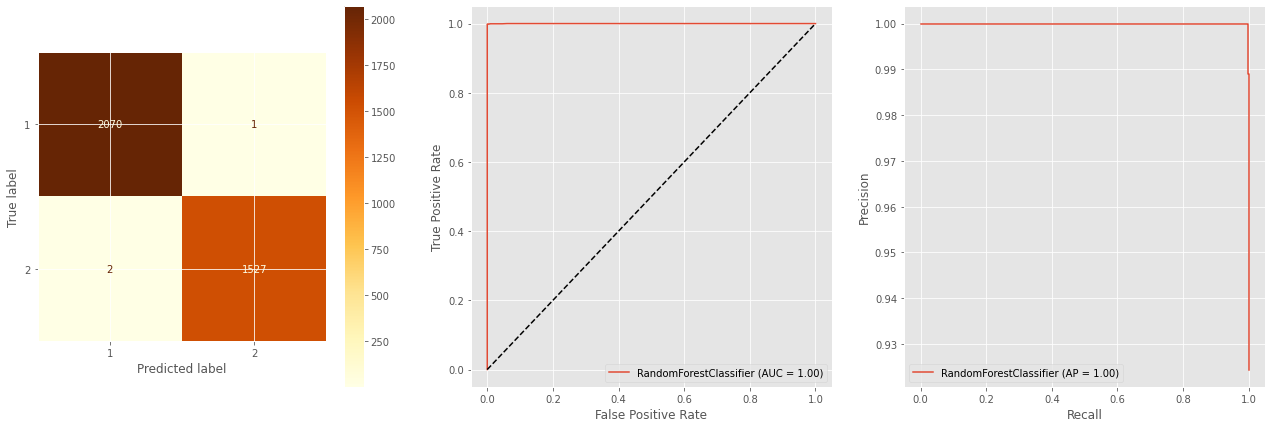

F1 score of minority class: 0.9990186457311089


0.9990186457311089

In [152]:
randomForest(train_X,train_y,test_X,test_y)

In [109]:
F_train_X,F_train_y,F_test_X,F_test_y = reset(train,test)

F_train_X,F_test_X = fourier(F_train_X,F_test_X)
F_train_X,F_test_X = savgol(F_train_X,F_test_X)
F_train_X,F_test_X = norm(F_train_X,F_test_X)
F_train_X,F_test_X = robust(F_train_X,F_test_X)

F_train_X,F_train_y = smote(F_train_X,F_train_y)

In [95]:
F_train_X,F_train_y,F_test_X,F_test_y = reset(train,test)

In [65]:
F_train_X = np.array(F_train_X)
F_test_X = np.array(F_test_X)


x = np.array(range(3197))

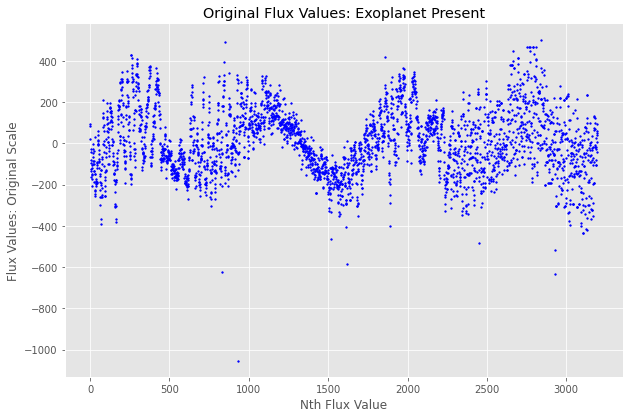

In [33]:
plt.figure(figsize=(10,6.5))
plt.scatter(x, F_train_X[:][0], s=3, c='blue')
plt.xlabel('Nth Flux Value')
plt.ylabel('Flux Values: Original Scale')
plt.title('Original Flux Values: Exoplanet Present')
plt.savefig('..\\..\\plots\\original_label_2.png', dpi=500)

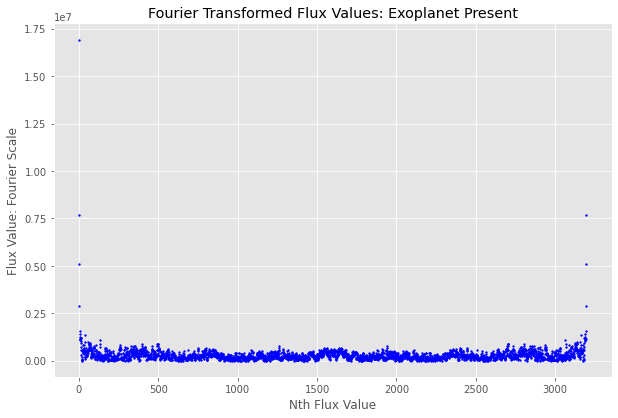

In [35]:
F_train_X,F_test_X = fourier(F_train_X,F_test_X)
plt.figure(figsize=(10,6.5))
plt.scatter(x, F_train_X[:][0], s=3, c='blue')
plt.xlabel('Nth Flux Value')
plt.ylabel('Flux Value: Fourier Scale')
plt.title('Fourier Transformed Flux Values: Exoplanet Present')
plt.savefig('..\\..\\plots\\fourier_label_2.png', dpi=500)

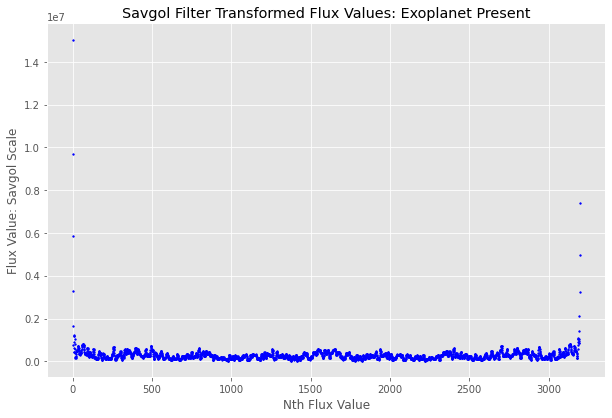

In [37]:
F_train_X,F_test_X = savgol(F_train_X,F_test_X)
plt.figure(figsize=(10,6.5))
plt.scatter(x, F_train_X[:][0], s=3, c='blue')
plt.xlabel('Nth Flux Value')
plt.ylabel('Flux Value: Savgol Scale')
plt.title('Savgol Filter Transformed Flux Values: Exoplanet Present')
plt.savefig('..\\..\\plots\\savgol_label_2.png', dpi=500)

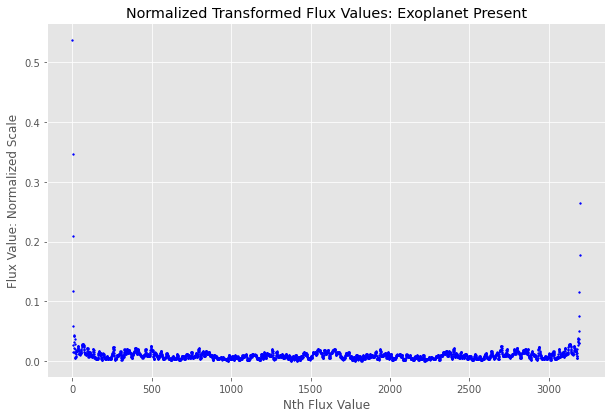

In [38]:
F_train_X,F_test_X = norm(F_train_X,F_test_X)
plt.figure(figsize=(10, 6.5))
plt.scatter(x, F_train_X[:][0], s=3, c='blue')
plt.xlabel('Nth Flux Value')
plt.ylabel('Flux Value: Normalized Scale')
plt.title('Normalized Transformed Flux Values: Exoplanet Present')
plt.savefig('..\\..\\plots\\norm_label_2.png', dpi=500)

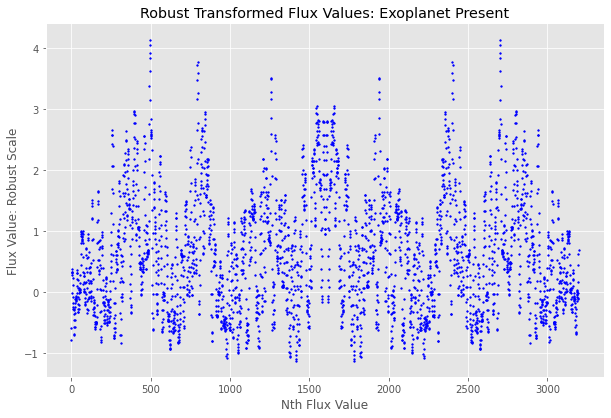

In [39]:
F_train_X,F_test_X = robust(F_train_X,F_test_X)
plt.figure(figsize=(10, 6.5))
plt.scatter(x, F_train_X[:][0], s=3, c='blue')
plt.xlabel('Nth Flux Value')
plt.ylabel('Flux Value: Robust Scale')
plt.title('Robust Transformed Flux Values: Exoplanet Present')
plt.savefig('..\\..\\plots\\Robust_label_2.png', dpi=500)

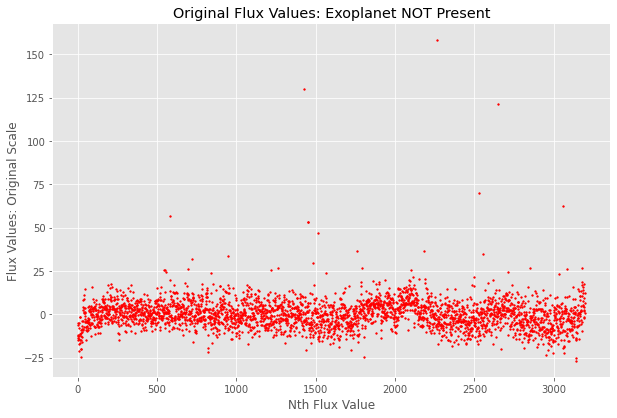

In [54]:
plt.figure(figsize=(10,6.5))
plt.scatter(x, F_train_X[:][500], s=3, c='red')
plt.xlabel('Nth Flux Value')
plt.ylabel('Flux Values: Original Scale')
plt.title('Original Flux Values: Exoplanet NOT Present')
plt.savefig('..\\..\\plots\\original_label_1.png', dpi=500)

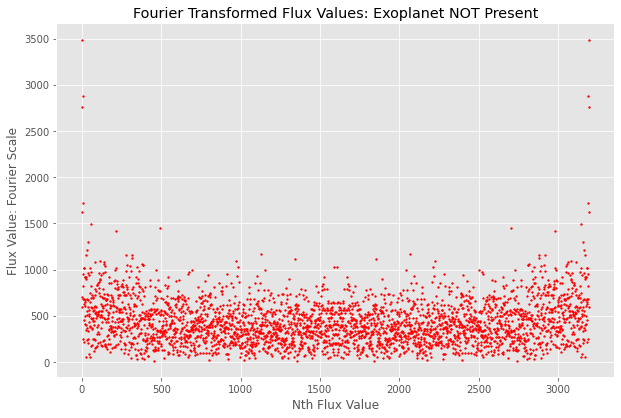

In [55]:
F_train_X,F_test_X = fourier(F_train_X,F_test_X)
plt.figure(figsize=(10,6.5))
plt.scatter(x, F_train_X[:][500], s=3, c='red')
plt.xlabel('Nth Flux Value')
plt.ylabel('Flux Value: Fourier Scale')
plt.title('Fourier Transformed Flux Values: Exoplanet NOT Present')
plt.savefig('..\\..\\plots\\fourier_label_1.png', dpi=500)

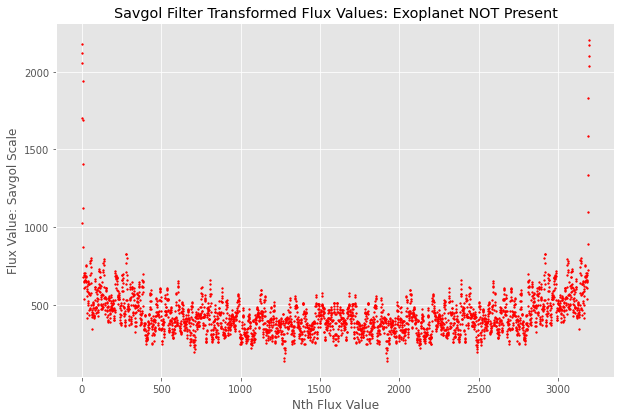

In [56]:
F_train_X,F_test_X = savgol(F_train_X,F_test_X)
plt.figure(figsize=(10,6.5))
plt.scatter(x, F_train_X[:][500], s=3, c='red')
plt.xlabel('Nth Flux Value')
plt.ylabel('Flux Value: Savgol Scale')
plt.title('Savgol Filter Transformed Flux Values: Exoplanet NOT Present')
plt.savefig('..\\..\\plots\\savgol_label_1.png', dpi=500)

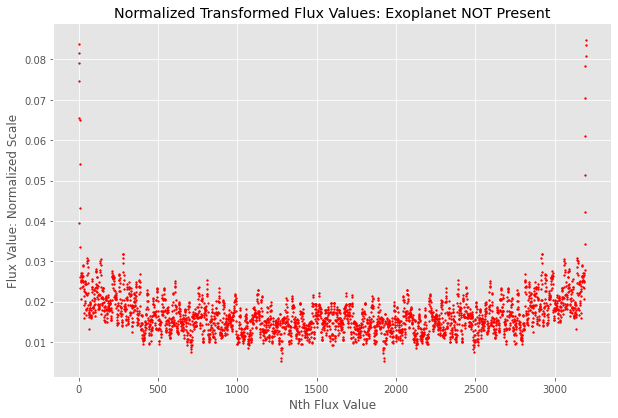

In [57]:
F_train_X,F_test_X = norm(F_train_X,F_test_X)
plt.figure(figsize=(10, 6.5))
plt.scatter(x, F_train_X[:][500], s=3, c='red')
plt.xlabel('Nth Flux Value')
plt.ylabel('Flux Value: Normalized Scale')
plt.title('Normalized Transformed Flux Values: Exoplanet NOT Present')
plt.savefig('..\\..\\plots\\norm_label_1.png', dpi=500)

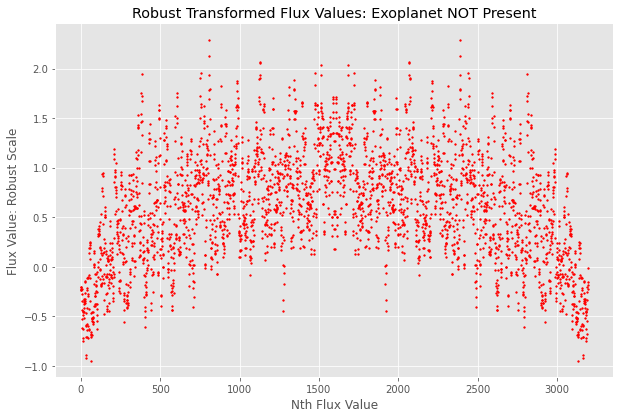

In [58]:
F_train_X,F_test_X = robust(F_train_X,F_test_X)
plt.figure(figsize=(10, 6.5))
plt.scatter(x, F_train_X[:][500], s=3, c='red')
plt.xlabel('Nth Flux Value')
plt.ylabel('Flux Value: Robust Scale')
plt.title('Robust Transformed Flux Values: Exoplanet NOT Present')
plt.savefig('..\\..\\plots\\Robust_label_1.png', dpi=500)

Text(0.5, 1.0, 'SMOTE')

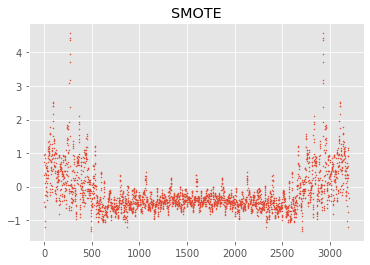

In [44]:
F_train_X,F_train_y = smote(F_train_X,F_train_y)
plt.scatter(x, F_train_X[:][0], s=1)
plt.title('SMOTE')

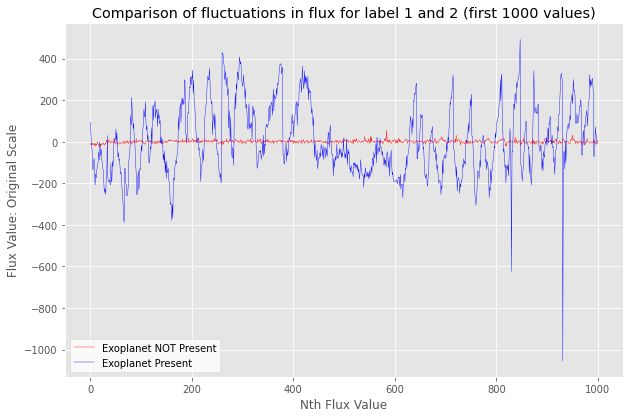

In [94]:
# F_train_X,F_test_X = reset(F_train_X,F_test_X)
f_1000_2=(F_train_X[:][0])
f_1000_1=(F_train_X[:][500])
plt.figure(figsize=(10, 6.5))
plt.plot(x[:1000], f_1000_1[:1000], c='red', linewidth=0.4)
plt.plot(x[:1000], f_1000_2[:1000], c='blue', linewidth=0.4)
plt.xlabel('Nth Flux Value')
plt.ylabel('Flux Value: Original Scale')
plt.title('Comparison of fluctuations in flux for label 1 and 2 (first 1000 values)')
plt.legend(["Exoplanet NOT Present", "Exoplanet Present"], loc="lower left", facecolor='white')
plt.savefig('..\\..\\plots\\comparison_of_label_1_2.png', dpi = 500)
# plt.xlabel('Nth Flux Value')
# plt.ylabel('Flux Value: Robust Scale')
# plt.title('Robust Transformed Flux Values: Exoplanet NOT Present')
# plt.savefig('..\\..\\plots\\Robust_label_1.png', dpi=500)

In [108]:
unique, counts = np.unique(F_train_y, return_counts=True)
count_BS = dict(zip(unique, counts))

label_1_bs = count_BS[1]
label_2_bs = count_BS[2]

print(label_2_bs)
print(label_1_bs)

37
5050


In [110]:
unique, counts = np.unique(F_train_y, return_counts=True)
count_AS = dict(zip(unique, counts))

label_1_as = count_AS[1]
label_2_as = count_AS[2]

print(label_2_as)
print(label_1_as)

5050
5050


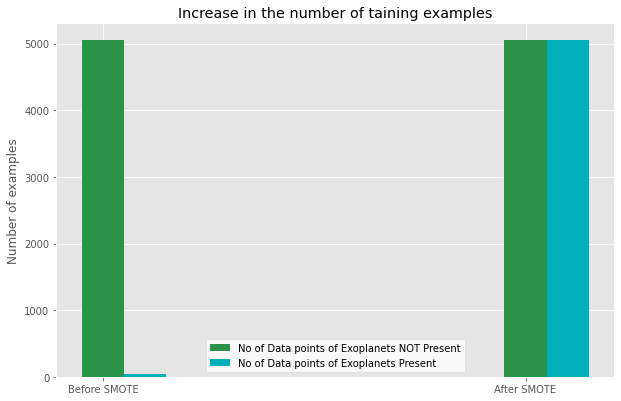

In [141]:
data = [[label_1_bs, label_1_as], 
        [label_2_bs, label_2_as]]
X = np.arange(2)
m = ['Before SMOTE', 'After SMOTE']
X_axis = np.arange(len(m))

plt.figure(figsize=(10, 6.5))
# plt.add_axes([0,0,1,1])
plt.xticks(X_axis, m)
plt.ylabel('Number of examples')
plt.title('Increase in the number of taining examples')
plt.bar(X + 0.00, data[0], color = '#2b9348', width = 0.1, label = 'No of Data points of Exoplanets NOT Present')
plt.bar(X + 0.1, data[1], color = '#00afb9', width = 0.1, label = 'No of Data points of Exoplanets Present')
plt.legend(facecolor = 'white')
plt.savefig('..\\..\\plots\\Data_points_increase.png', dpi = 500)